<a href="https://colab.research.google.com/github/davidesqalv/bottling-line-segmentation/blob/main/Bottling_line_segmentation_with_template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Subir imagenes

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
import copy
from skimage import io,color

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Histograma

Imprimir el histograma

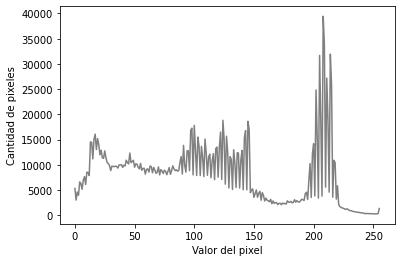

(1080, 1920)


In [ ]:
#importar librerias
import cv2
import numpy as np
from matplotlib import pyplot as plt
#Cargar la imagen en tonos de grises
img = cv2.imread('/content/drive/My Drive/Sistemas de vision/Tarea 2/imagenes/253.jpg', cv2.IMREAD_GRAYSCALE)

#Histograma
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray' )

plt.xlabel('Valor del pixel')
plt.ylabel('Cantidad de pixeles')
plt.show()


print(np.shape(img)) #imprimir tamano de la imagen


### Detectar zona de interes donde estan las botellas [link text](https://unipython.com/la-transformada-linea-hough/)

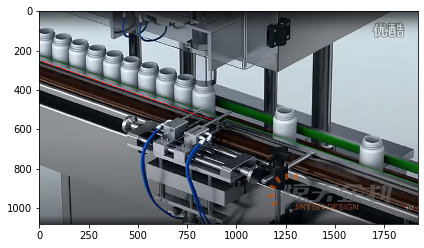

In [ ]:
import cv2
import numpy as np
 
img = cv2.imread('/content/drive/My Drive/Sistemas de vision/Tarea 2/imagenes/253.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
 
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
 
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
 
cv2.imwrite('houghlines1.jpg',img)
 
cv2.imwrite('houghlines1.jpg',img)
#Cargar la imagen
img2 = io.imread('houghlines1.jpg')
#imprimir imagen real
io.imshow(img2)
io.show()


In [ ]:
#Ecuacion de la linea recta
m=(x2-x1)/(y2-y1)
b=x2-m*y2
print(m,b)

2.9092307692307693 -732.0769230769231


In [ ]:
d=(np.shape(img))#dimension de la imagen
print(np.shape(img))
print(d[0],d[1])

(1080, 1920, 3)
1080 1920


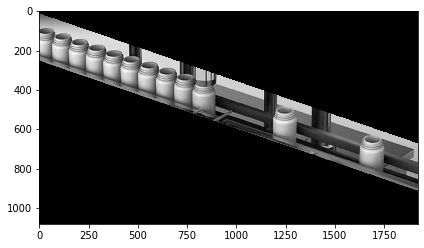

In [ ]:
img_gray = cv2.imread('/content/drive/My Drive/Sistemas de vision/Tarea 2/imagenes/253.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('/content/drive/My Drive/Sistemas de vision/Tarea 2/imagenes/253.jpg')

recorte = copy.deepcopy(img_gray)
recorte_rgb = copy.deepcopy(img)

for x in range(d[0]): #recorrer la matriz de la imagen
  for y in range(d[1]):
    yt=m*x+b
    yt2=m*x+(b+700)
    if (yt>y):#pixeles mapeados a color negro
      recorte[x,y]=0
      recorte_rgb[x,y]=0
    if yt2<y:#pixeles mapeados a color negro
      recorte[x,y]=0
      recorte_rgb[x,y]=0

#imprimir imagen 
io.imshow(recorte)
io.show()

(1080, 1920, 3)


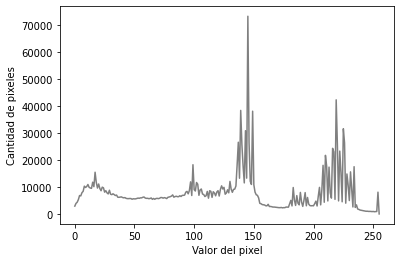

In [ ]:
#Histograma
print(np.shape(img))
hist = cv2.calcHist([img], [0], None, [256], [1, 256])
plt.plot(hist, color='gray' )

plt.xlabel('Valor del pixel')
plt.ylabel('Cantidad de pixeles')
plt.show()

## Funciones para la segmentacion

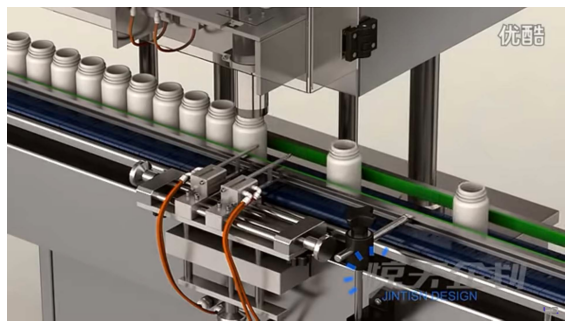

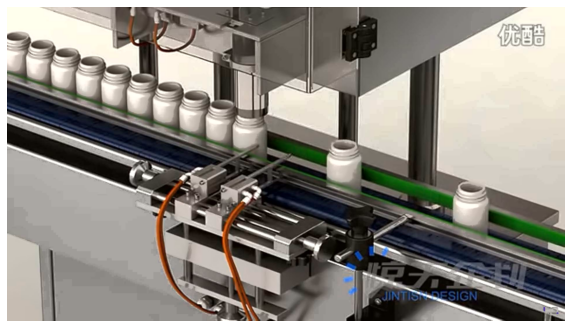

In [ ]:
import cv2
import numpy
 
img = cv2.imread('/content/drive/My Drive/Sistemas de vision/Tarea 2/imagenes/cuadro_video.jpg')
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)

plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(hist_equalization_result, cmap='gray')
plt.axis('off')
plt.show()
 
# cv2.imwrite('result.jpg',hist_equalization_result)

#Template matching

27908046.0 285482848.0 (1118, 461) (899, 566)


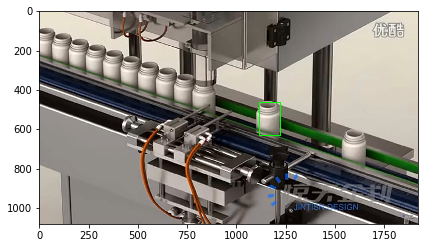

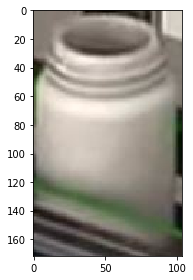

In [ ]:
image = cv2.imread('/content/drive/My Drive/Sistemas de vision/Tarea 2/imagenes/cuadro_video.jpg')
template = cv2.imread('/content/drive/My Drive/Sistemas de vision/Tarea 2/imagenes/template_botella.jpg')

# plt.figure(figsize=(10,10))
# plt.imshow(template, cmap='gray')
# plt.axis('off')
# plt.show()

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

res = cv2.matchTemplate(image_gray, template_gray, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

x1, y1 = min_loc
x2, y2 = min_loc[0] + template.shape[1], min_loc[1] + template.shape[0]

cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

io.imshow(image)
io.show()

io.imshow(template)
io.show()

# cv2.imshow("Image", image)
# cv2.imshow("Template", template)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

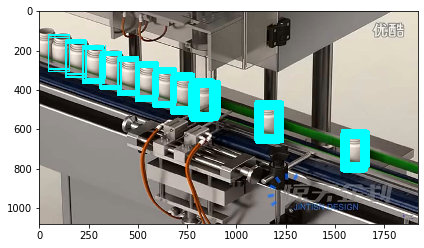

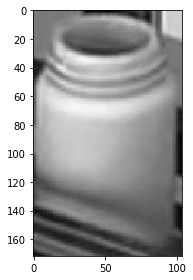

In [ ]:
img_rgb = cv2.imread('/content/drive/My Drive/Sistemas de vision/Tarea 2/imagenes/cuadro_video.jpg')
template = cv2.imread('/content/drive/My Drive/Sistemas de vision/Tarea 2/imagenes/template_botella.jpg')

template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

imagen_cuadros = copy.deepcopy(img_rgb)

height, width = template.shape[::]

res = cv2.matchTemplate(recorte, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res, cmap='gray')

threshold = 0.55 #For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where(res >= threshold)  

# for pt in zip(loc[::-1]):
#     cv2.rectangle(img_rgb, pt, (pt[0] + width, pt[1] + height), (255, 0, 0), 1)

for (x, y) in zip(loc[1], loc[0]):
    cv2.rectangle(imagen_cuadros, (x, y), (x+width, y+height), [0,255,255], 2)

io.imshow(imagen_cuadros)
io.show()

io.imshow(template)
io.show()

#Prueba copiando detecciones a imagen vacia

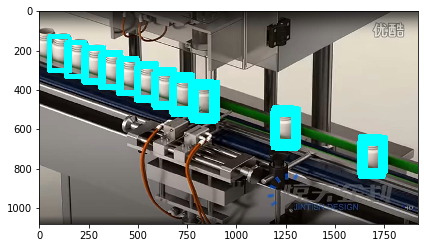

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


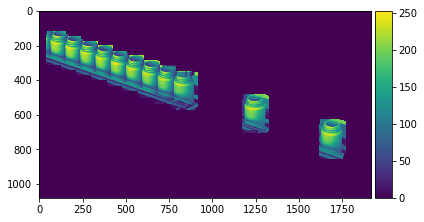

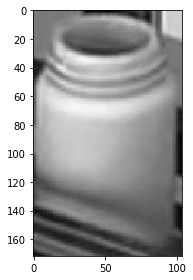

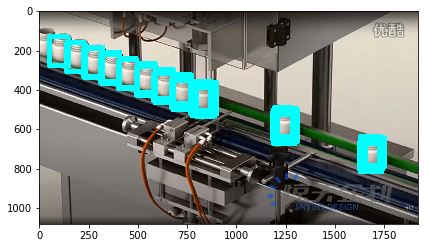

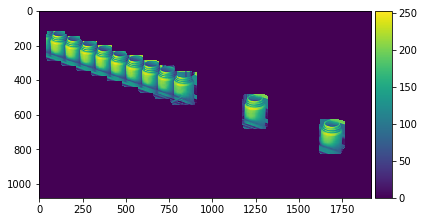

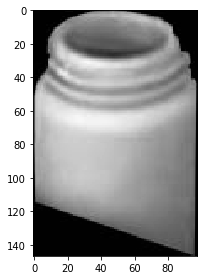

In [ ]:
img_rgb = cv2.imread('/content/drive/My Drive/Sistemas de vision/Tarea 2/imagenes/253.jpg')
template = cv2.imread('/content/drive/My Drive/Sistemas de vision/Tarea 2/imagenes/template_botella.jpg')
template2 = cv2.imread('/content/drive/My Drive/Sistemas de vision/Tarea 2/imagenes/template_botella2.jpg')

template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template2 = cv2.cvtColor(template2, cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

img_matches = np.zeros((img_gray.shape[0], img_gray.shape[1]))

imagen_cuadros = copy.deepcopy(img_rgb)

height, width = template.shape[::]

res = cv2.matchTemplate(recorte, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res, cmap='gray')

threshold = 0.55 #For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where(res >= threshold)  

for (x, y) in zip(loc[1], loc[0]):
    img_matches[y:y+height,x:x+width] = copy.deepcopy(img_gray[y:y+height,x:x+width])

    cv2.rectangle(imagen_cuadros, (x, y), (x+width, y+height), [0,255,255], 2)


img_matches2 = np.zeros((img_gray.shape[0], img_gray.shape[1]))
height, width = template2.shape[::]
res = cv2.matchTemplate(recorte, template, cv2.TM_CCOEFF_NORMED)
imagen_cuadros2 = copy.deepcopy(img_rgb)

threshold2 = 0.55

loc = np.where(res >= threshold2)

for (x, y) in zip(loc[1], loc[0]):
    img_matches2[y:y+height,x:x+width] = copy.deepcopy(img_gray[y:y+height,x:x+width])

    cv2.rectangle(imagen_cuadros2, (x, y), (x+width, y+height), [0,255,255], 2)

io.imshow(imagen_cuadros)
io.show()

io.imshow(img_matches)
io.show()

io.imshow(template)
io.show()

io.imshow(imagen_cuadros2)
io.show()

io.imshow(img_matches2)
io.show()

io.imshow(template2)
io.show()

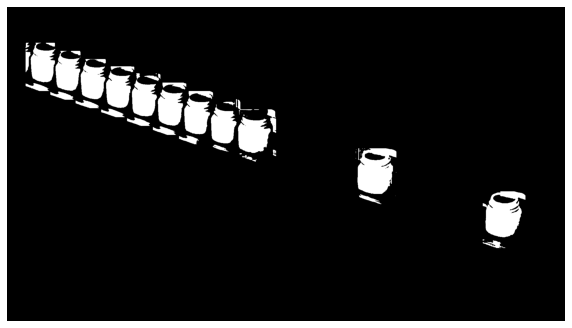

In [ ]:

ret, thresh = cv2.threshold(img_matches2, 120, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

0.0
0.0
12877.5
6.0
10.5
79.0
2012.5
0.0
3.5
10750.0
2.0
12.0
4.0
2.0
0.0
6809.0
6.0
38.0
10.0
5046.5
50.0
5.5
0.0
351.5
2.5
11.0
97.0
250.5
1036.0
10.0
6.0
5062.0
14.5
39.0
0.0
0.0
5.0
0.5
58.5
0.0
0.0
178.5
1066.5
2.0
0.0
0.0
71.5
595.5
4.5
6118.0
30.0
6.0
8.0
9.0
17.0
0.0
5037.0
12.5
0.5
44.0
550.0
1051.0
10.0
99.0
86.0
6021.5
2.0
8.0
10.0
9.0
2.0
2.0
45.0
2.0
280.5
6006.0
6.0
12.5
6.0
2.0
242.0
78.0
5944.5
31.0
10.0
13.0
323.5
3.5
78.0
23.0
4.0
16.0
6026.5
7.0
34.0
5.5
0.0
8.0
54.5
31.0
4.0


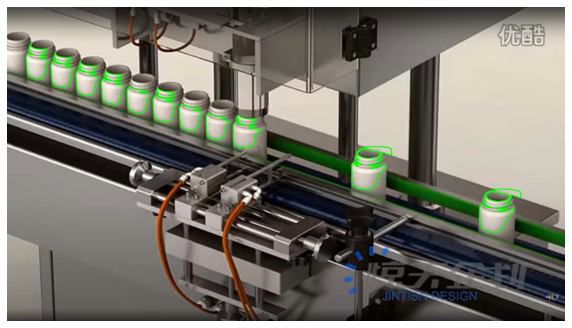

In [ ]:

contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)                                      

# draw contours on the original image

image_copy = img_rgb.copy()
binario_copy = thresh.copy()

botellas = []

for contour in contours:
  area = cv2.contourArea(contour)
  print(area)
  if area > 2000:
    botellas.append(contour)

cv2.drawContours(image=image_copy, contours=botellas, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(image_copy, cmap='gray')
plt.axis('off')
plt.show()



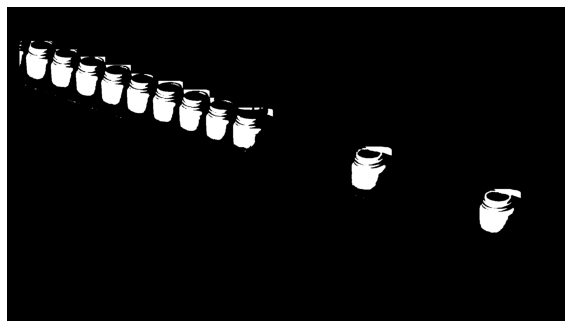

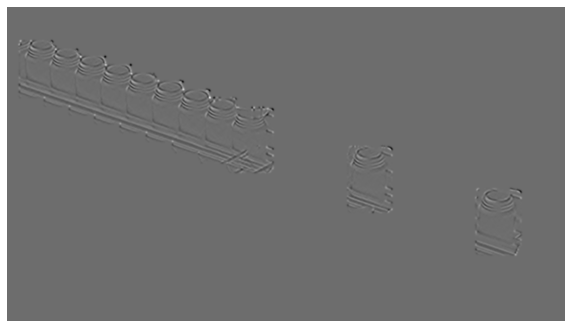

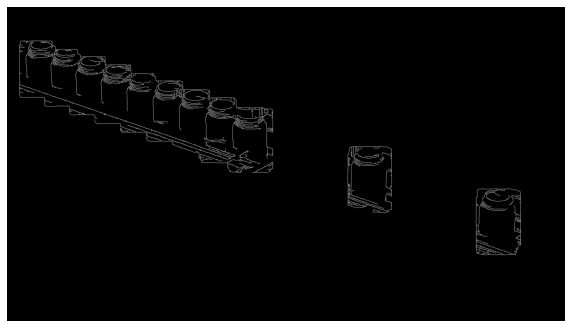

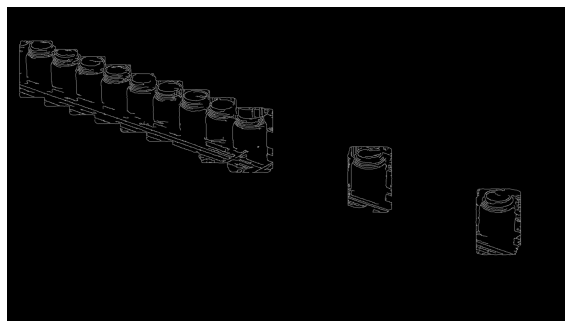

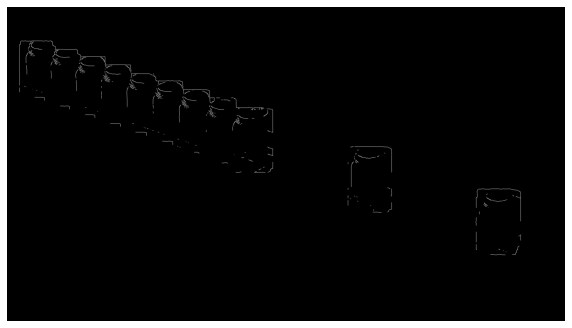

In [ ]:
img_matches = img_matches.astype('uint8')

wide = cv2.Canny(img_matches, 10, 200)
mid = cv2.Canny(img_matches, 1, 150)
tight = cv2.Canny(img_matches, 240, 250)

sobelxy = cv2.Sobel(src=img_matches, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=31) # Combined Xy

ret, thresh = cv2.threshold(img_matches, 150, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(sobelxy, cmap='gray')
plt.axis('off')
plt.show()


plt.figure(figsize=(10,10))
plt.imshow(wide, cmap='gray')
plt.axis('off')
plt.show()


plt.figure(figsize=(10,10))
plt.imshow(mid, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(tight, cmap='gray')
plt.axis('off')
plt.show()


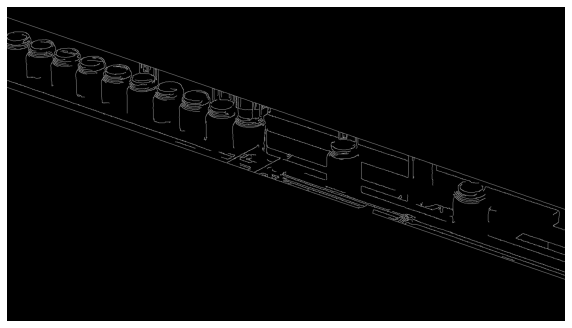

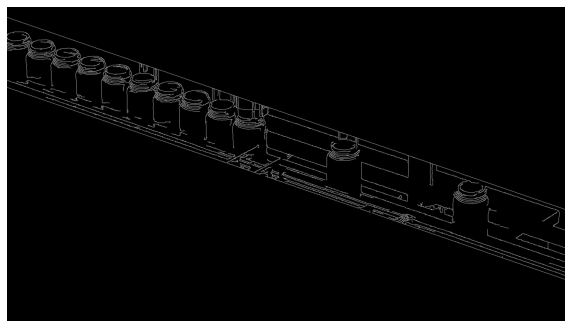

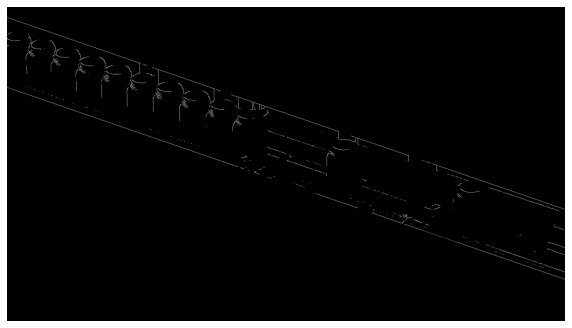

In [ ]:
wide = cv2.Canny(recorte, 10, 200)
mid = cv2.Canny(recorte, 30, 150)
tight = cv2.Canny(recorte, 240, 250)

plt.figure(figsize=(10,10))
plt.imshow(wide, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(mid, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(tight, cmap='gray')
plt.axis('off')
plt.show()